**import all the modules needed**

In [ ]:
import pandas as pd
import mplfinance as mpf
import mplfinance as fplt
import yfinance as yf
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
%matplotlib inline

**get the data of nasdaq 100 futres from yahoo finance , this time i want to know the weekly trend, so i created a 10weeks and 40 weeks sma dataframe**

In [ ]:
ticker="NQ=F"

df = yf.download(ticker, start="2000-01-01", end="2024-01-01", interval='1wk')

df['SMA_10'] = df['Adj Close'].rolling(10, min_periods=1).mean()

df['SMA_40'] = df['Adj Close'].rolling(40, min_periods=1).mean()

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_40
Date,,,,,,,,
2023-05-08,13316.00,13494.25,13202.75,13396.25,13396.25,3179435,13010.365039,12120.194263
2023-05-15,13378.75,13960.25,13350.00,13858.00,13858.00,3088226,13212.140039,12127.200513
2023-05-22,13805.50,14369.00,13566.50,14332.50,14332.50,3449882,13385.925000,12153.800513
2023-05-29,14437.50,14627.75,14248.25,14575.25,14575.25,2808246,13554.425000,12202.669263
2023-06-05,14577.00,14694.75,14256.75,14341.75,14341.75,1835754,13658.425000,12258.606763


**plot the sma curve**
**this time we saw 10 weeks sma is over 40 weeks , there is higher probability to earn profit by long position**

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


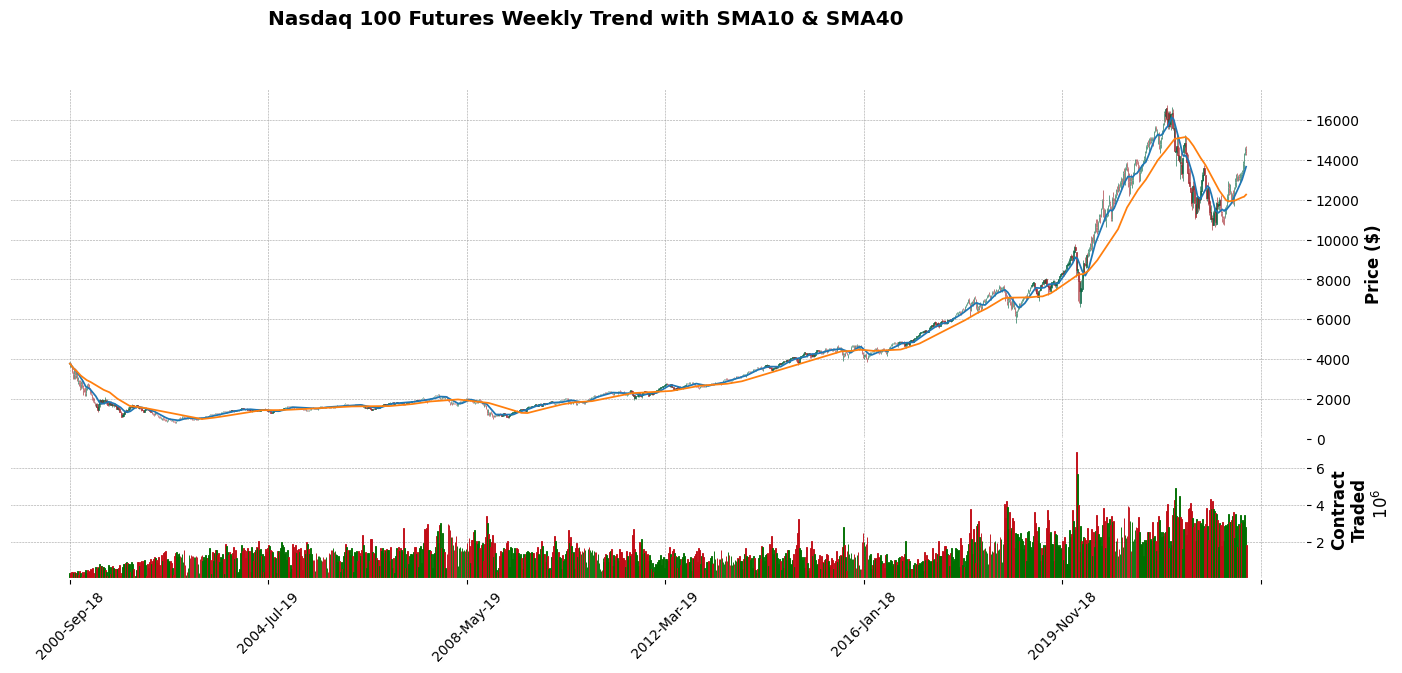

In [ ]:
sma = fplt.make_addplot(df[["SMA_10", "SMA_40"]])
fplt.plot(df,type='candle', 
          style='charles' ,
          title='Nasdaq 100 Futures Weekly Trend with SMA10 & SMA40',
          ylabel='Price ($)', 
          volume=True, 
          figsize=(18,7),
          ylabel_lower='Contract\nTraded',
          addplot = sma,
        )

**this may be more clearly to see the curve**

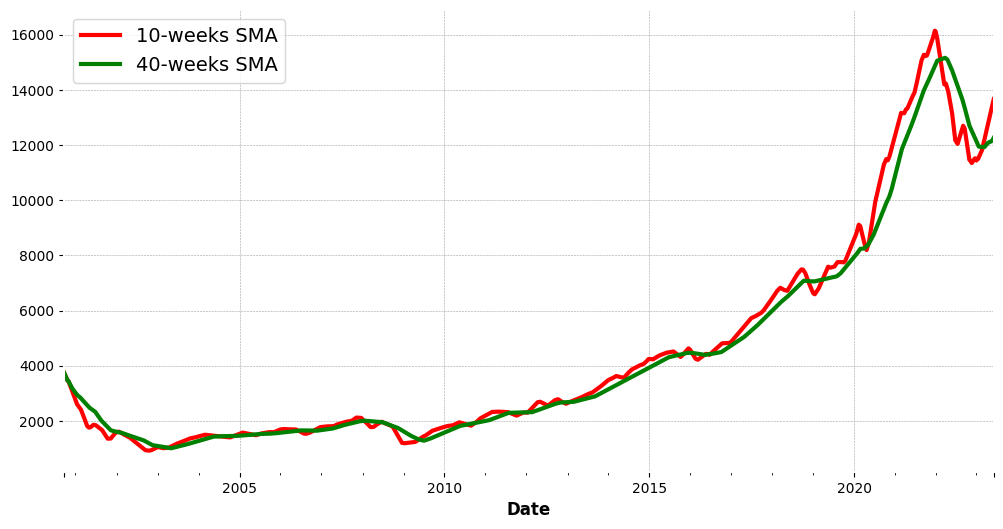

In [ ]:
df['SMA_10'].plot(color='red', linewidth=3, figsize=(12,6))
df['SMA_40'].plot(color='green', linewidth=3, figsize=(12,6))
plt.legend(labels =['10-weeks SMA', '40-weeks SMA'], fontsize=14)

** then renko chart, first get the monthly data of nasdaq 100**

In [ ]:
df = yf.download(ticker, start="2000-01-01", end="2024-01-01",interval='1mo')

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,12116.00,12949.75,11923.00,12072.25,12072.25,12850113
2023-03-01,12041.25,13311.50,11674.25,13301.75,13301.75,14405451
2023-04-01,13262.00,13348.75,12800.00,13320.25,13320.25,11080818
2023-05-01,13317.00,14570.00,13001.75,14300.50,14300.50,14311417
2023-06-01,14289.50,14694.75,14248.25,14341.00,14341.00,3081385


**i am looking for long term investment to i set 5% of the futures price per brick**

In [ ]:
x=df['Adj Close'].iloc[-1]*0.05
print('Brick Size is',x)

Brick Size is 717.0500000000001


**the chart looks like this**

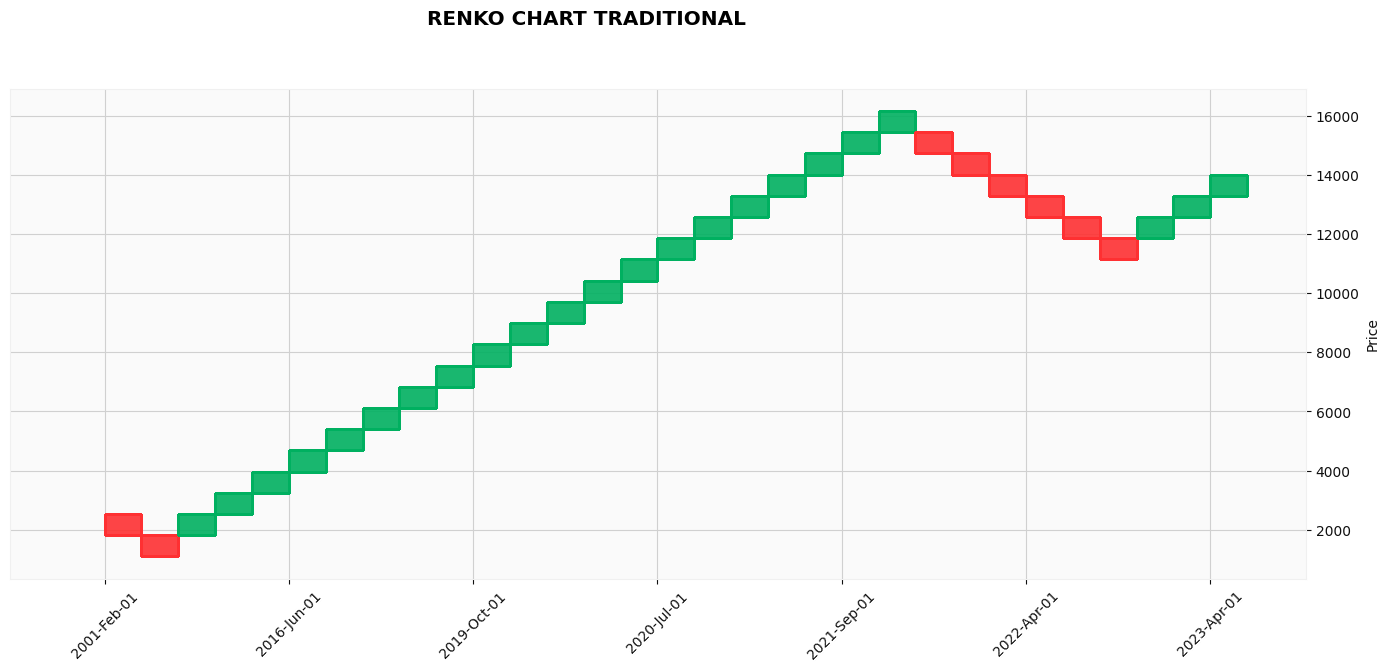

In [ ]:
fplt.plot(df,type='renko',
          renko_params=dict(brick_size=x),
          style='yahoo',
          figsize=(18,7), 
          title = "RENKO CHART TRADITIONAL")

**this renko chart brick size varies depends on the sizeof the underlying assets for example if stock price is 1000 the brick size should be 10 if stock price (indice) is 10000 or above i will take the brick size as 100**

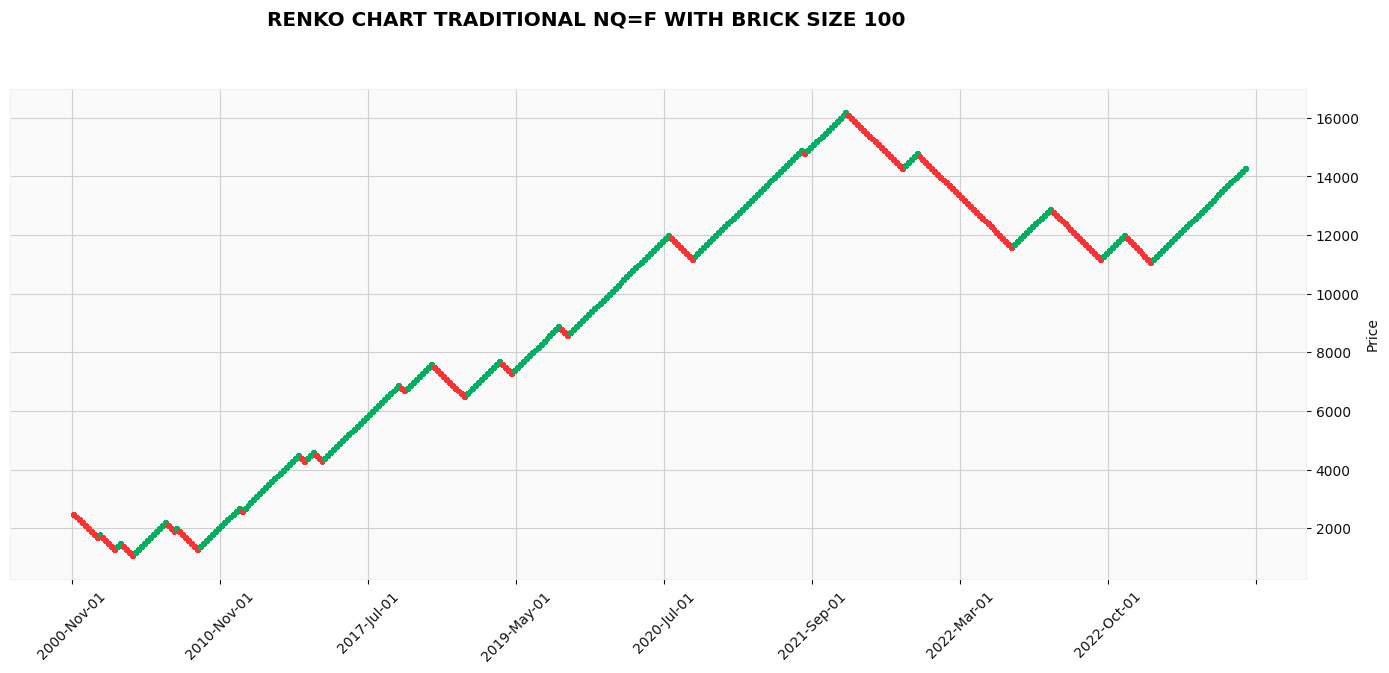

In [ ]:
y=df['Adj Close'].iloc[-1]
if y > 0 and y <=10:
    x = 0.5
elif y > 10 and y<= 50:
    x = 1
elif y > 50 and y <= 100:
    x = 2.5
elif y > 100 and y <= 1000:
    x = 5
elif y > 1000 and y <= 10000:
    x = 10
elif y > 10000:
    x = 100
fplt.plot(df,type='renko',
          renko_params=dict(brick_size=x),
          style='yahoo',
          figsize=(18,7),
          title = "RENKO CHART TRADITIONAL {0} WITH BRICK SIZE {1}".format(ticker,x))

**good weekly simple moving average trend and 2 renko analysis are green brick in this moment i believe that its the right time to long nasdaq100 futures**

 **train the data (this time i use 10 years daily historical price) with LSTM Model**

In [ ]:
df = yf.download(ticker, start="2013-01-01", end="2024-01-01", interval='1d')

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

[*********************100%***********************]  1 of 1 completed


2497

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.63105729e-03],
       [1.67594745e-03],
       [7.74900434e-04],
       ...,
       [8.56661441e-01],
       [8.38280081e-01],
       [8.38964877e-01]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00263106, 0.00167595, 0.0007749 , 0.0011173 , 0.00084698,
       0.00142365, 0.00250491, 0.00299148, 0.00191022, 0.00086501,
       0.00171199, 0.0027572 , 0.00227064, 0.00351408, 0.00409075,
       0.00115334, 0.00185616, 0.00254095, 0.00291939, 0.00241481,
       0.00163991, 0.00391054, 0.00066677, 0.00338794, 0.00252293,
       0.00286533, 0.00502784, 0.00491972, 0.0042169 , 0.0049017 ,
       0.00468544, 0.00425294, 0.00565858, 0.00254095, 0.00084698,
       0.00241481, 0.        , 0.00039646, 0.0027572 , 0.00257699,
       0.00335189, 0.00416284, 0.00692004, 0.0061992 , 0.00699212,
       0.00715431, 0.007749  , 0.00726244, 0.0069741 , 0.00747869,
       0.00755077, 0.0061091 , 0.00556847, 0.00598295, 0.00486565,
       0.00657764, 0.00591087, 0.00702817, 0.00711827, 0.00783911])]
[0.006181182534104629]

[array([0.00263106, 0.00167595, 0.0007749 , 0.0011173 , 0.00084698,
       0.00142365, 0.00250491, 0.00299148, 0.00191022, 0.00086501,
       0.00171199, 0.0027572 , 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2437/2437 [==============================] - 132s 50ms/step - loss: 0.0013


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 2437 to 2497 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 36ms/step


230.417430104196

<ipython-input-16-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


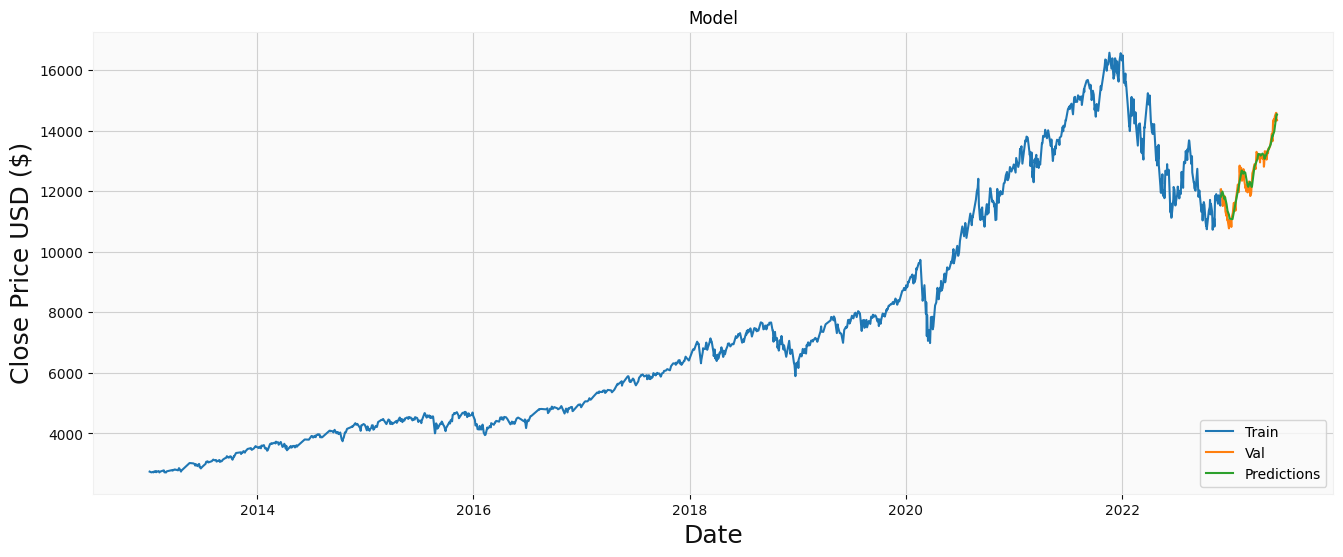

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Nasdaq Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()